## Paediatric traumatic brain injury as a risk factor for psychosis and psychotic symptoms: a systematic review and meta-analysis

In [26]:
# Load R packages
library(meta)
library(dplyr)

Read file with extracted data for meta-analysis

In [2]:
pTBI_psychosis_meta_datafile <- "/home/main/data/Yau_et_al_pTBI_psychosis_data.csv"
pTBI_psychosis_meta_df <- read.csv(pTBI_psychosis_meta_datafile, header = TRUE)

Remove rows with missing data for Exposure_Events (makes the forest plot easier to read)

In [3]:
pTBI_psychosis_meta_df <- pTBI_psychosis_meta_df %>%
  filter_at(vars(Exposure_Events), all_vars(!is.na(.)))

#### Calculate meta-analysis for entire sample of studies

In [4]:
pTBI_psychosis_meta_overall <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                       studlab = Study, 
                                       label.e = "pTBI", label.c = "Control",
                                       fixed = FALSE, random = TRUE,
                                       method.tau = "SJ", prediction = TRUE,
                                       incr = 0.1, sm = "OR",           
                                       data = pTBI_psychosis_meta_df)

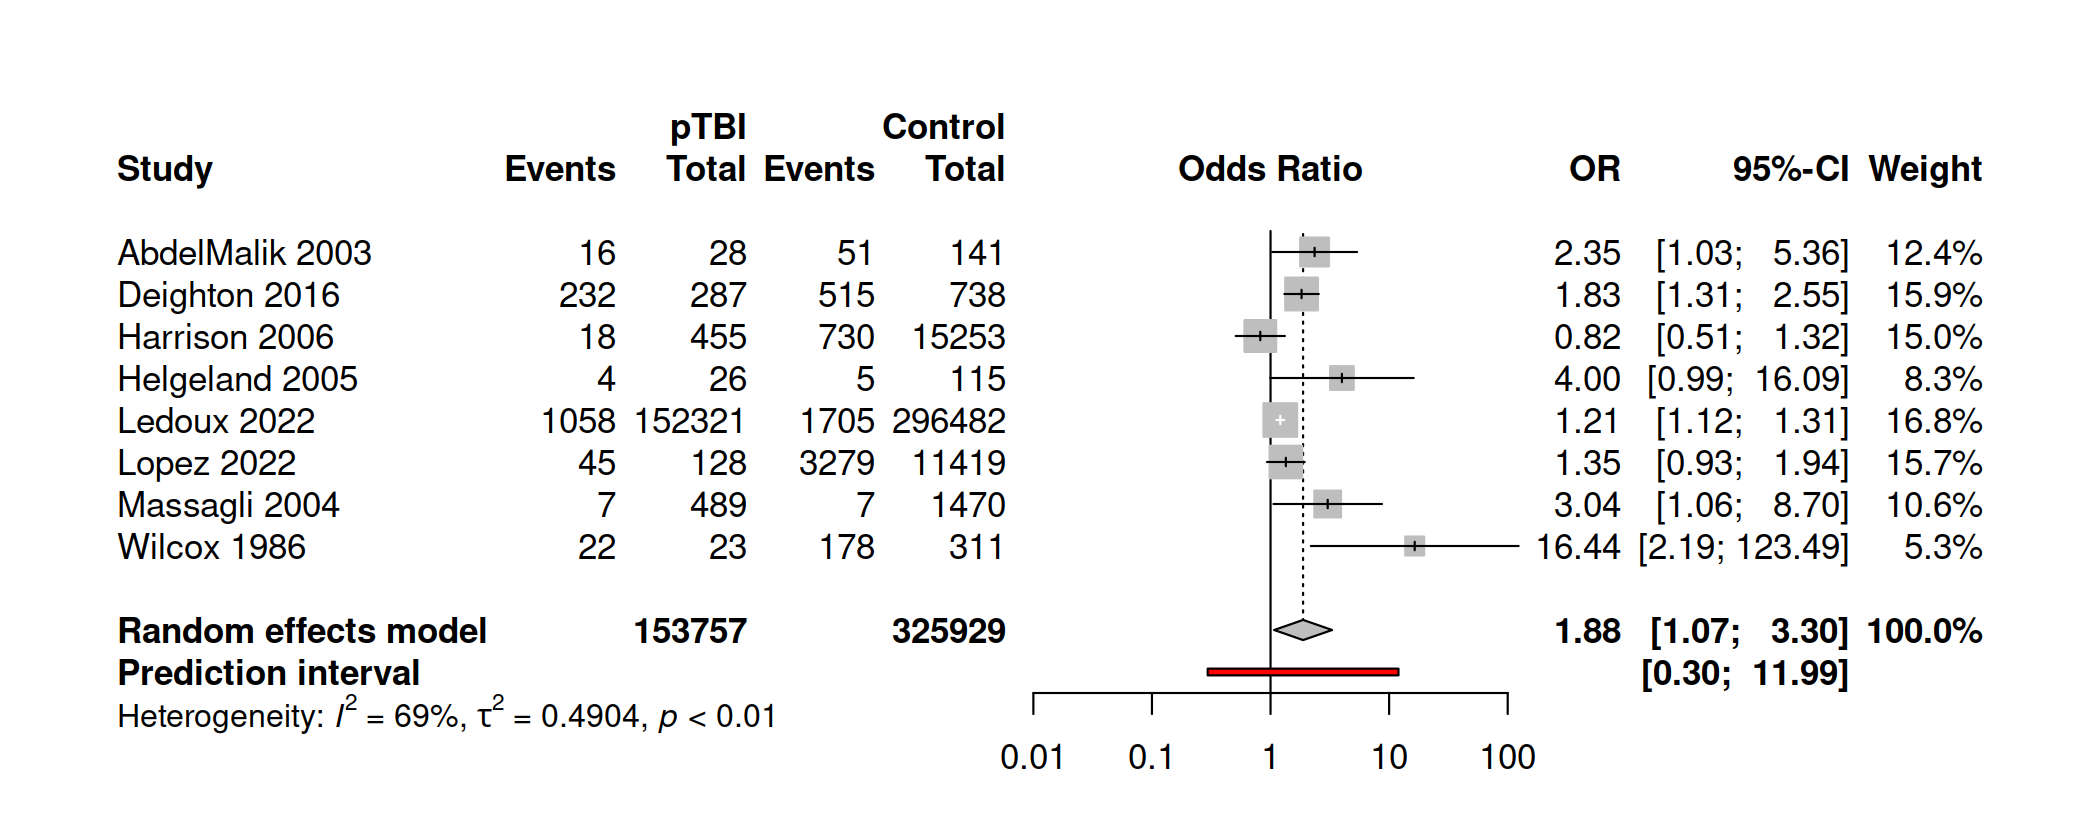

In [5]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res = 210)
forest(pTBI_psychosis_meta_overall)

#### Subgroup analysis for location of study

In [6]:
pTBI_psychosis_meta_location <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                        studlab = Study, 
                                        label.e = "pTBI", label.c = "Control",
                                        fixed = FALSE, random = TRUE,
                                        method.tau = "SJ", prediction = TRUE,
                                        incr = 0.1, sm = "OR",
                                        subgroup = Location_Bin,
                                        data = pTBI_psychosis_meta_df)

Forest plot

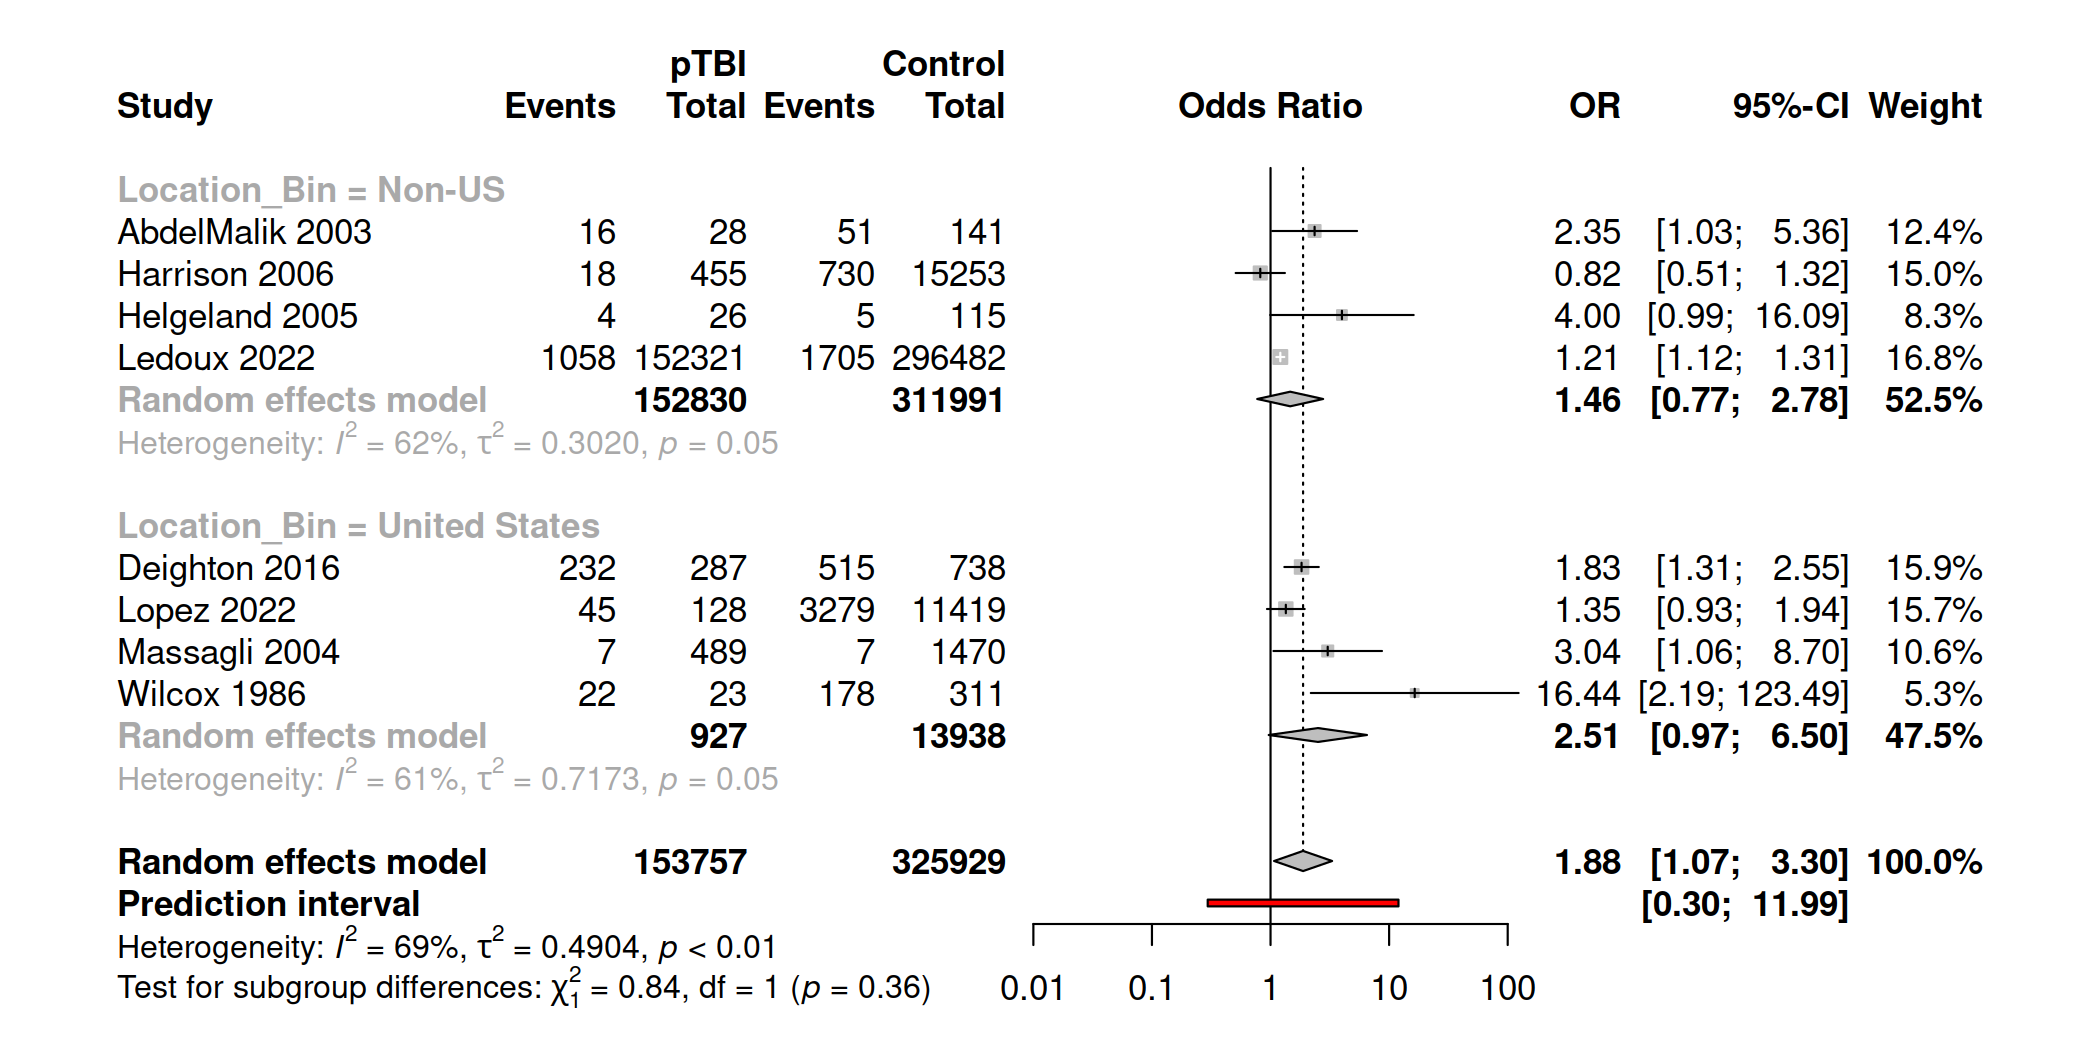

In [7]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_location)

Funnel plot

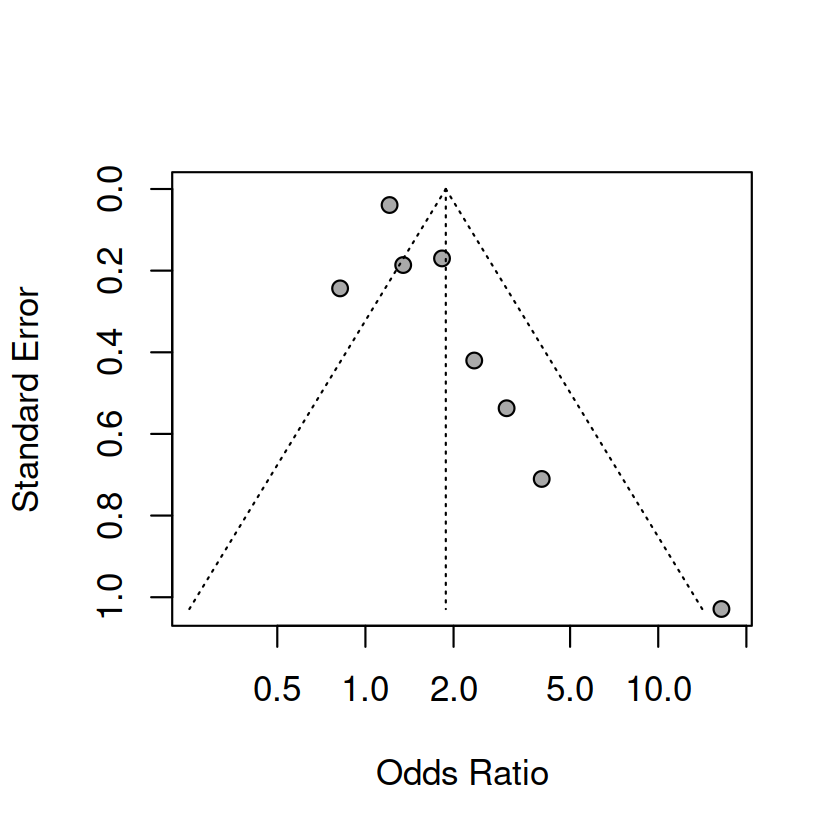

In [8]:
# Set image size and forest plot
options(repr.plot.width=4, repr.plot.height=4)
funnel(pTBI_psychosis_meta_overall)

Egger's test for funnel plot asymmetry

In [9]:
metabias(pTBI_psychosis_meta_overall, method.bias="linreg")

Warning message:
“Number of studies (k=8) too small to test for small study effects (k.min=10). Change argument 'k.min' if appropriate.”


#### Subgroup analysis for design of study

In [10]:
pTBI_psychosis_meta_design <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                      studlab = Study, 
                                      label.e = "pTBI", label.c = "Control",
                                      fixed = FALSE, random = TRUE,
                                      method.tau = "SJ", prediction = TRUE,
                                      incr = 0.1, sm = "OR",
                                      subgroup = Design_Bin,
                                      data = pTBI_psychosis_meta_df)

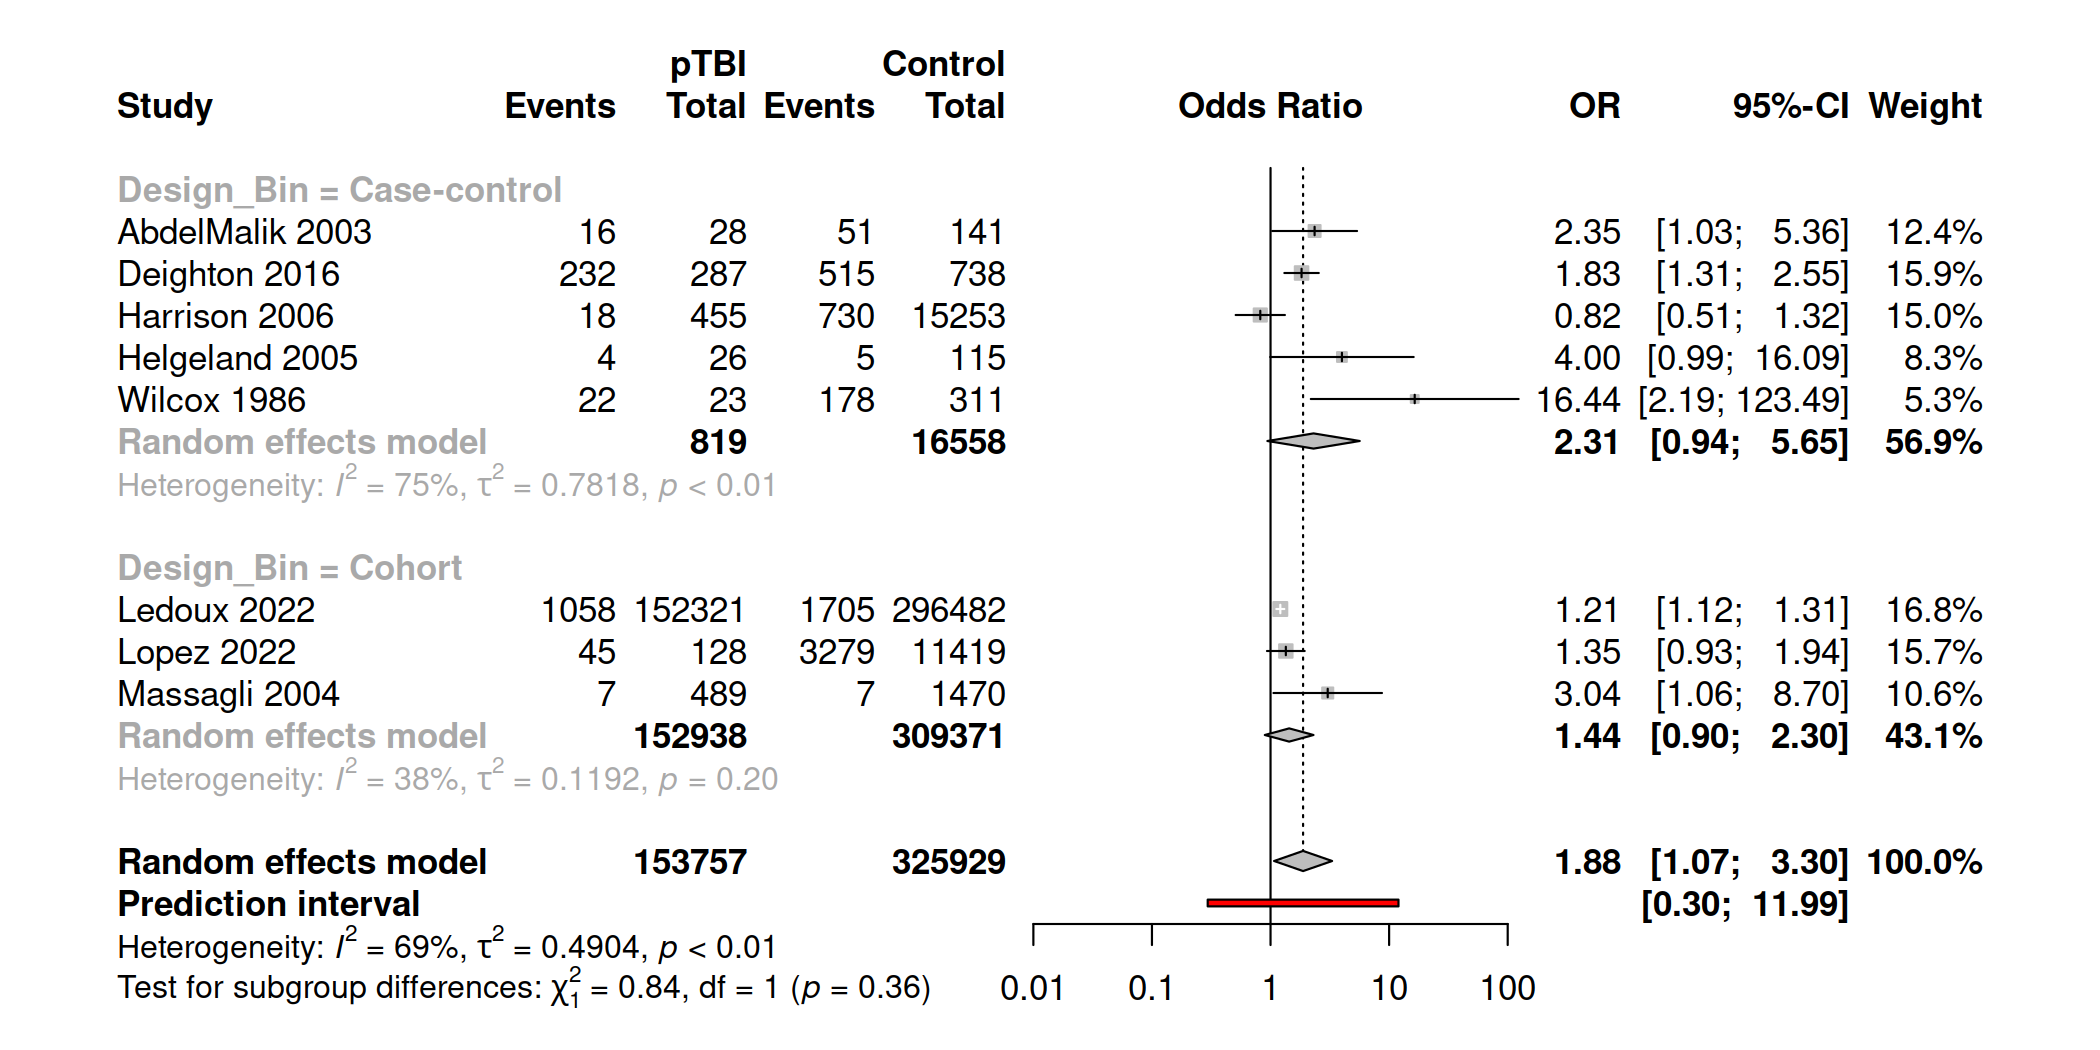

In [11]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_design)

#### Subgroup analysis for outcome of study

In [12]:
pTBI_psychosis_meta_outcome <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                       studlab = Study, 
                                       label.e = "pTBI", label.c = "Control",
                                       fixed = FALSE, random = TRUE,
                                       method.tau = "SJ", prediction = TRUE,
                                       incr = 0.1, sm = "OR",
                                       subgroup = Outcome_Bin,
                                       data = pTBI_psychosis_meta_df)

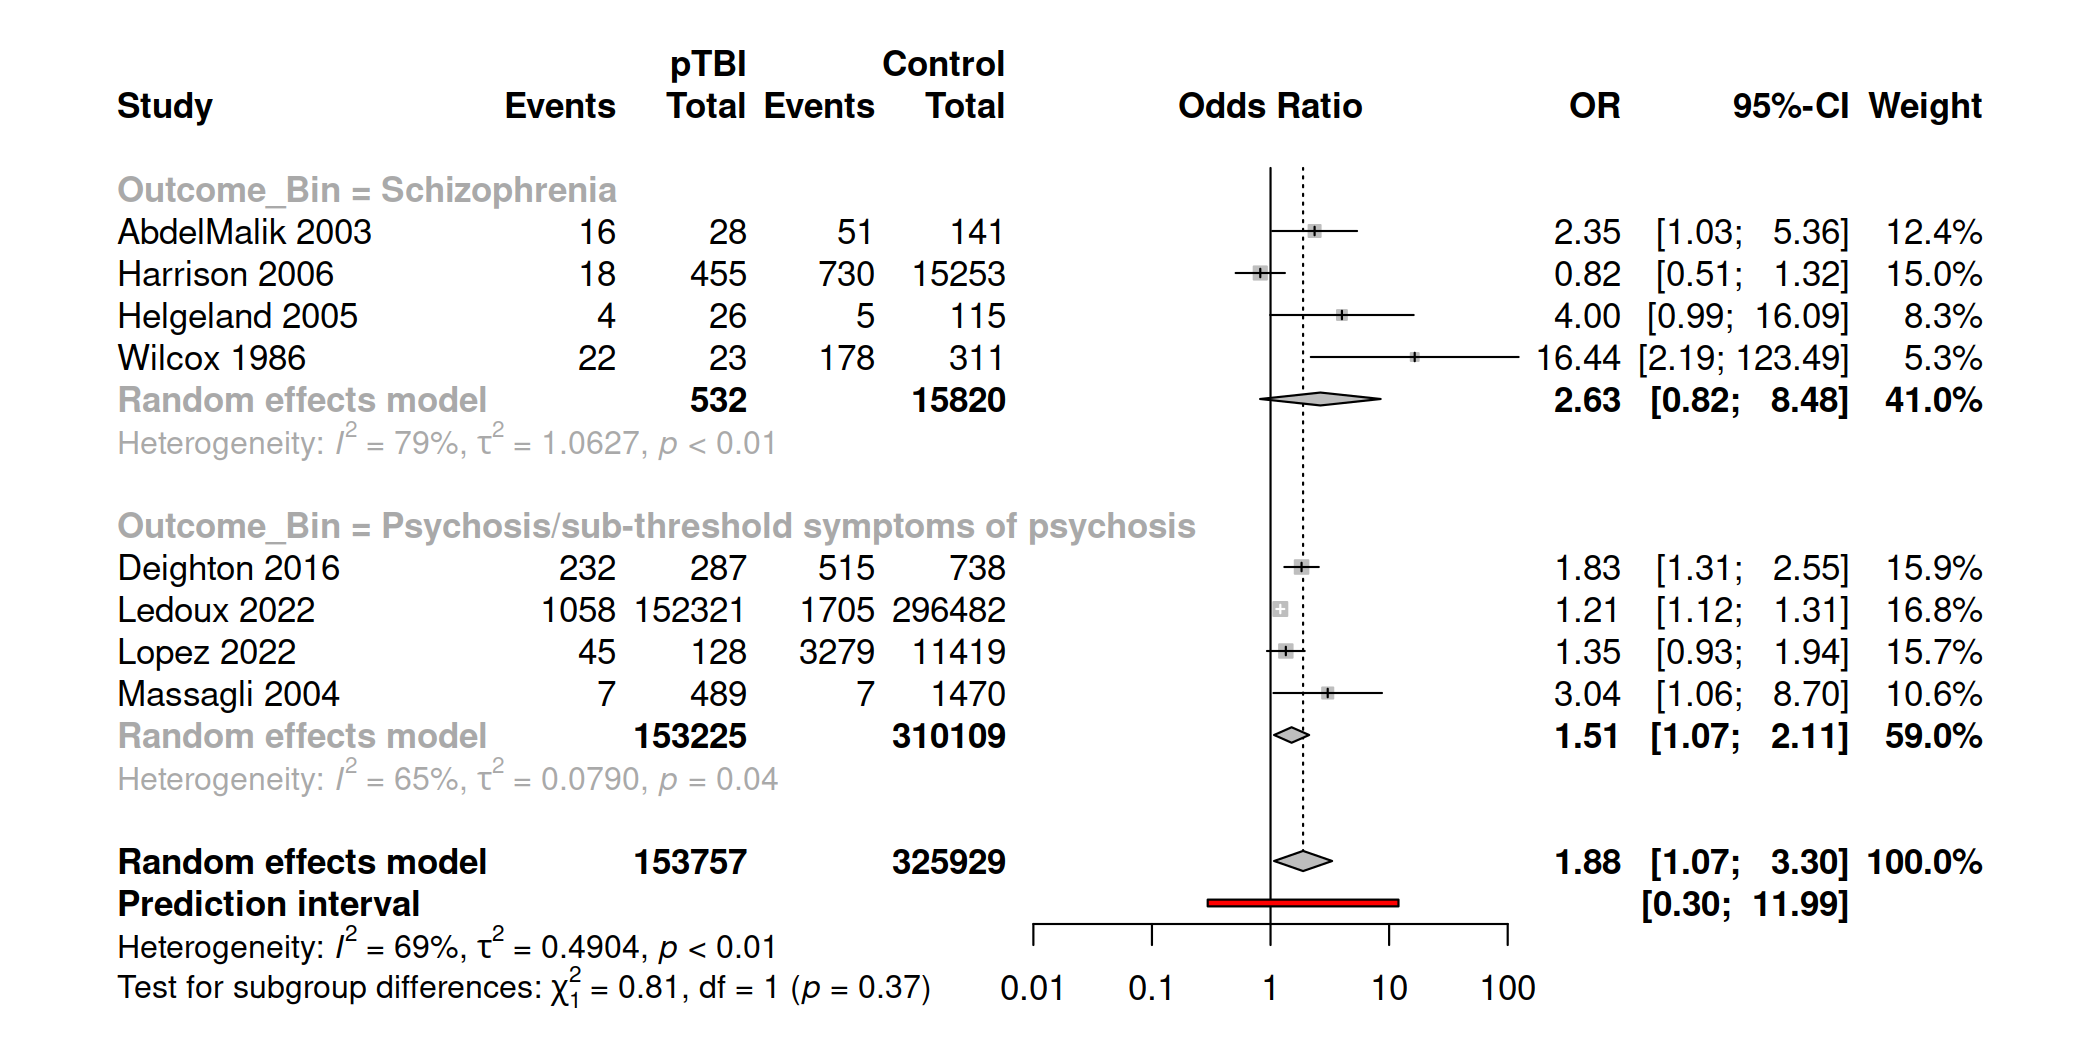

In [13]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_outcome)

#### Subgroup analysis for outcome measure of study

In [14]:
pTBI_psychosis_meta_measure <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                       studlab = Study, 
                                       label.e = "pTBI", label.c = "Control",
                                       fixed = FALSE, random = TRUE,
                                       method.tau = "SJ", prediction = TRUE,
                                       incr = 0.1, sm = "OR",
                                       subgroup = OutcomeMeasure_Bin,
                                       data = pTBI_psychosis_meta_df)

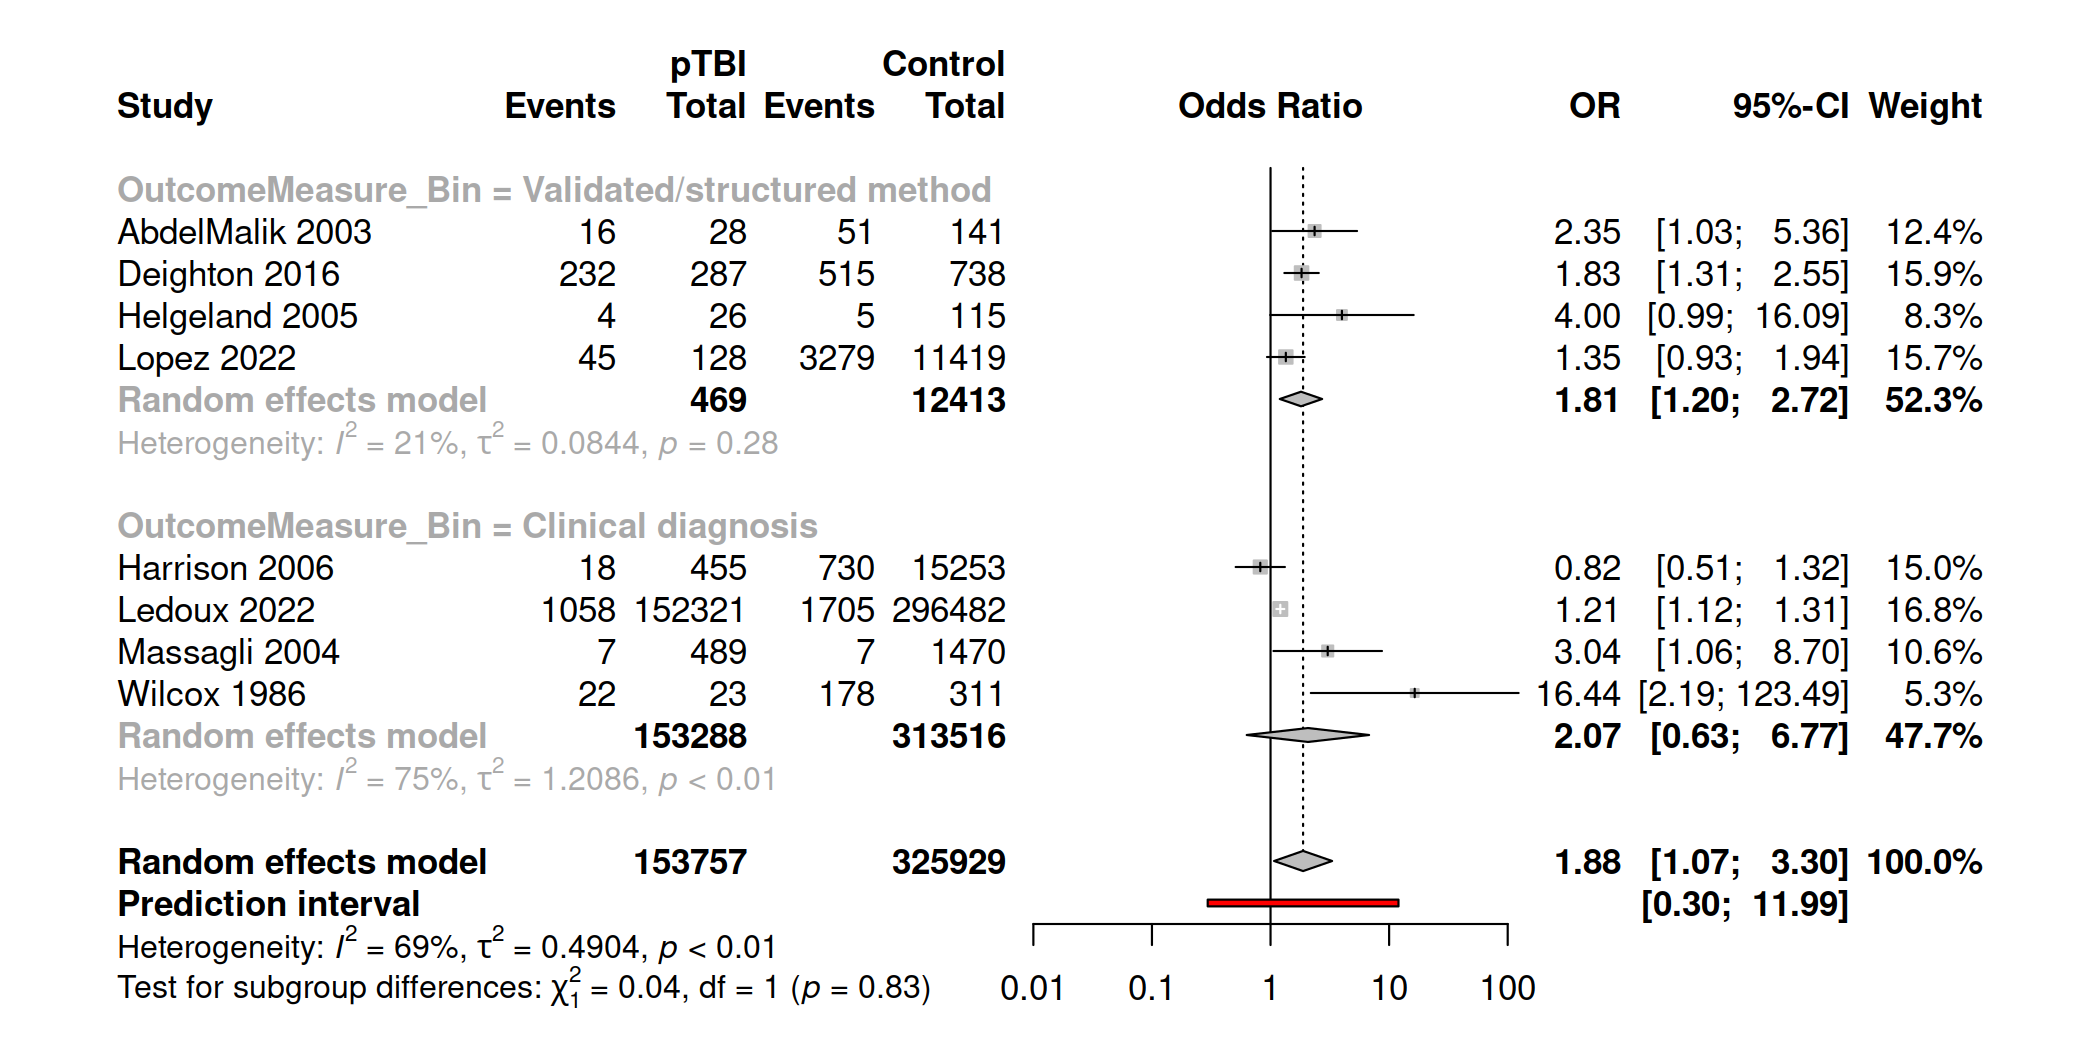

In [15]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_measure)

#### Subgroup analysis for adult / pre-adult onset outcome

In [16]:
# Calculate meta-analysis of odds ratios - Time_Onset_Outcome subgroup
pTBI_psychosis_meta_onset <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                             studlab = Study, 
                             label.e = "pTBI", label.c = "Control",
                             fixed = FALSE, random = TRUE,
                             method.tau = "SJ", prediction = TRUE,
                             incr = 0.1, sm = "OR",
                             subgroup = Time_Onset_Outcome,
                             data = pTBI_psychosis_meta_df)

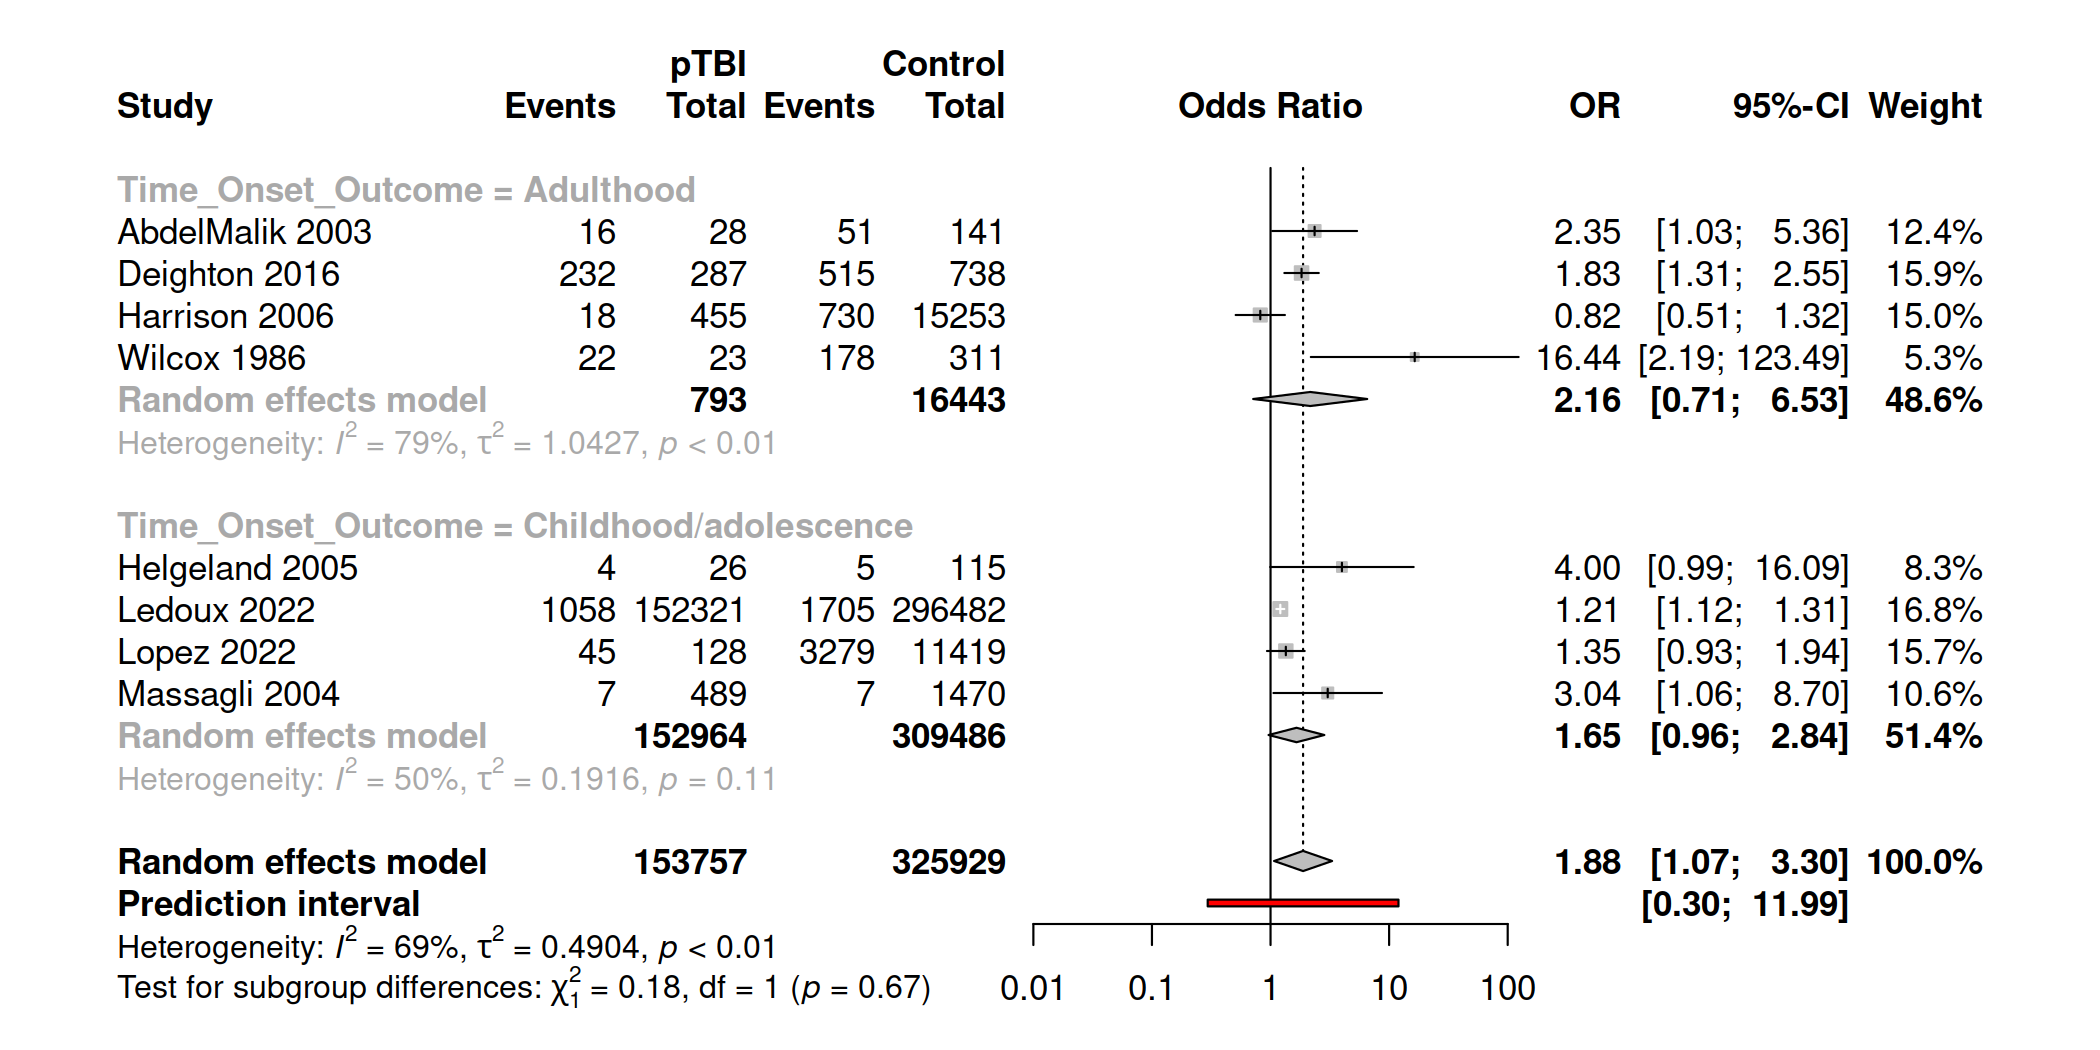

In [17]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_onset)

### Sensitivity analyses

#### Influence analysis: does the estimated pooled association remain robust when they are calculated omitting one study at a time? (Yes)

In [18]:
metainf(pTBI_psychosis_meta_overall, pooled = "random")

Influential analysis (random effects model)

                               OR           95%-CI p-value   tau^2     tau
Omitting AbdelMalik 2003   1.8714 [0.9742; 3.5949]  0.0599  0.5972  0.7728
Omitting Deighton 2016     1.9444 [1.0012; 3.7762]  0.0496  0.5964  0.7722
Omitting Harrison 2006     2.1310 [1.2053; 3.7675]  0.0093  0.4117  0.6416
Omitting Helgeland 2005    1.7740 [0.9637; 3.2656]  0.0656  0.5354  0.7317
Omitting Ledoux 2022       2.0779 [1.0987; 3.9297]  0.0245  0.5321  0.7295
Omitting Lopez 2022        2.0372 [1.0682; 3.8853]  0.0308  0.5578  0.7469
Omitting Massagli 2004     1.8127 [0.9591; 3.4262]  0.0671  0.5749  0.7582
Omitting Wilcox 1986       1.5531 [1.0569; 2.2821]  0.0250  0.1763  0.4199
                                                                          
Pooled estimate            1.8817 [1.0715; 3.3044]  0.0278  0.4904  0.7003
                              I^2
Omitting AbdelMalik 2003    70.7%
Omitting Deighton 2016      65.7%
Omitting Harrison 2006      

#### Meta-regression: does the quality of evidence (summary score) predict the results? (Yes, weakly)

In [19]:
metareg(pTBI_psychosis_meta_overall, ~ QualitySumScore)


Mixed-Effects Model (k = 8; tau^2 estimator: SJ)

tau^2 (estimated amount of residual heterogeneity):     0.1590 (SE = 0.1605)
tau (square root of estimated tau^2 value):             0.3988
I^2 (residual heterogeneity / unaccounted variability): 76.54%
H^2 (unaccounted variability / sampling variability):   4.26
R^2 (amount of heterogeneity accounted for):            67.58%

Test for Residual Heterogeneity:
QE(df = 6) = 8.7602, p-val = 0.1875

Test of Moderators (coefficient 2):
QM(df = 1) = 6.3629, p-val = 0.0117

Model Results:

                 estimate      se     zval    pval    ci.lb    ci.ub     
intrcpt            3.6649  1.2683   2.8897  0.0039   1.1792   6.1506  ** 
QualitySumScore   -0.0364  0.0144  -2.5225  0.0117  -0.0646  -0.0081   * 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Given that that there is a significant but weak association with study quality rating, does the association between pTBI and psychosis change when low quality studies are removed?

#### (Yes, from OR = 1.88 to OR = 1.45. However, CIs still do not cross zero and are more tightly clustered around estimate)

In [20]:
# Remove rows with low study quality for sensitivity analysis
pTBI_psychosis_meta_minus_lowqual <- pTBI_psychosis_meta_df %>%
  filter(!(Quality == "Low"))

In [21]:
# Re-run meta without sub-groups for sensitivity analysis
pTBI_psychosis_meta_sensitivity_qual <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                                studlab = Study, 
                                                label.e = "pTBI", label.c = "Control",
                                                fixed = FALSE, random = TRUE,
                                                method.tau = "SJ", prediction = TRUE,
                                                incr = 0.1, sm = "OR",
                                                data = pTBI_psychosis_meta_minus_lowqual)

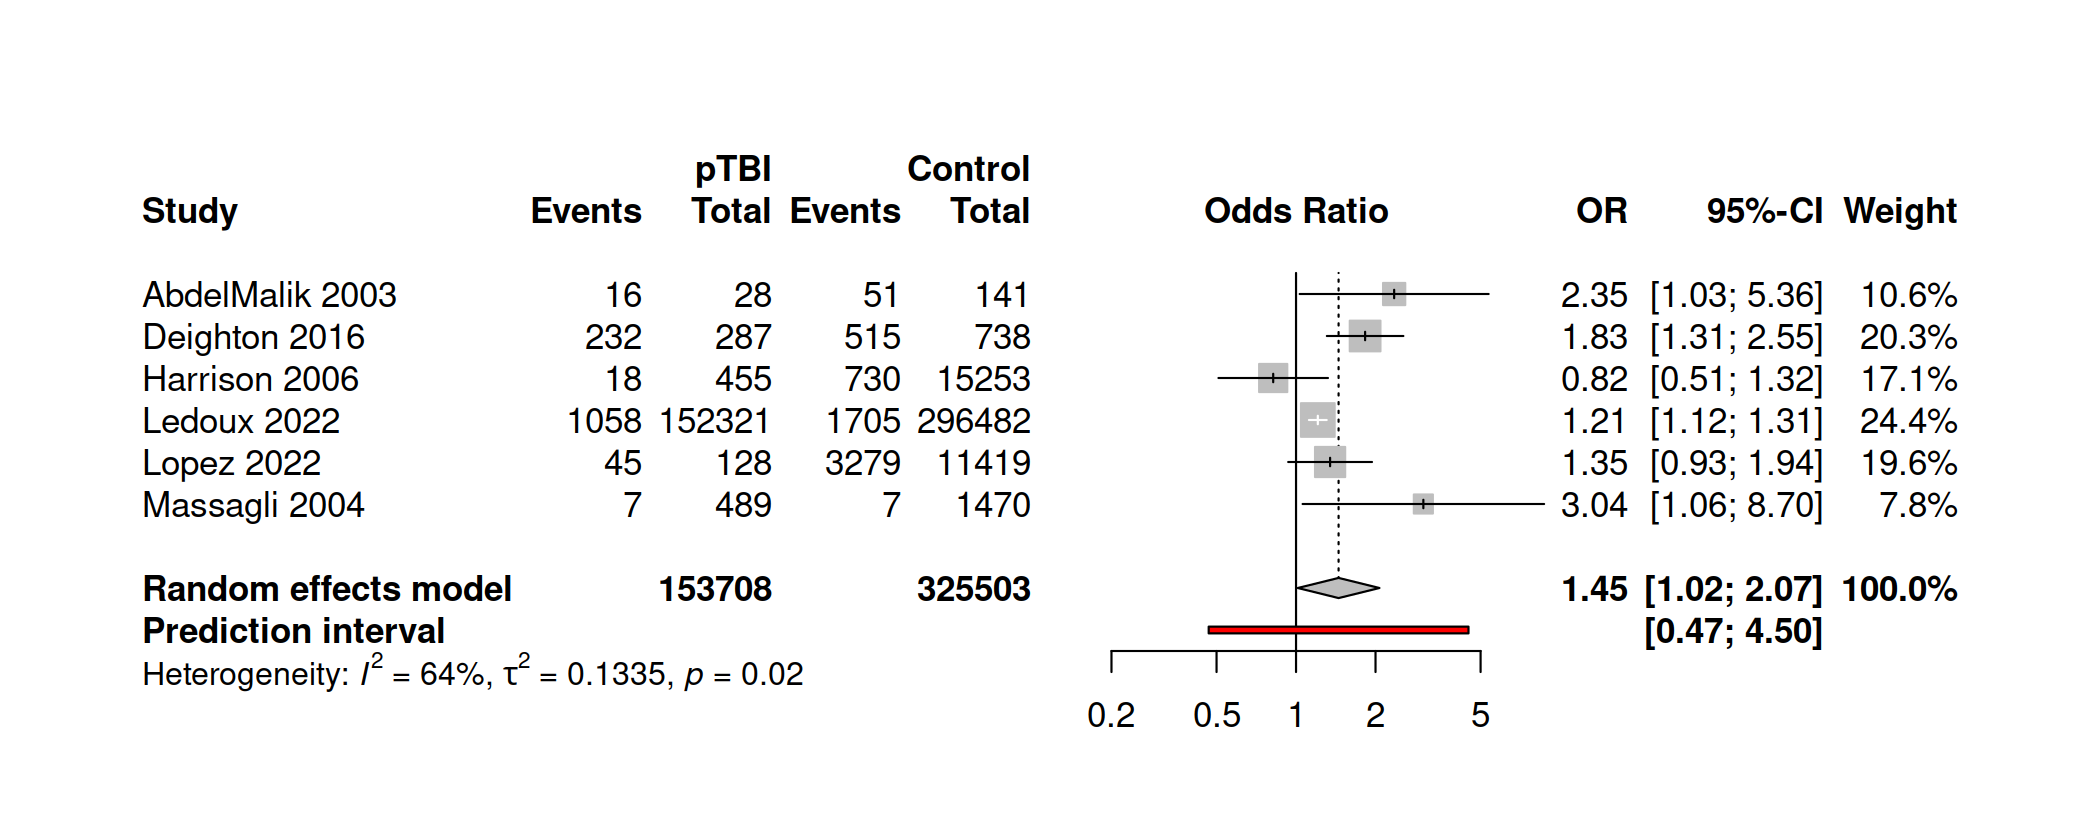

In [22]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res = 210)
forest(pTBI_psychosis_meta_sensitivity_qual)

### Analysis platform details and software versions

In [23]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          2.1                         
year           2022                        
month          06                          
day            23                          
svn rev        82513                       
language       R                           
version.string R version 4.2.1 (2022-06-23)
nickname       Funny-Looking Kid           

In [24]:
packageVersion("dplyr")

[1] ‘1.0.10’

In [25]:
packageVersion("meta")

[1] ‘6.0.0’